In [1]:
import pandas as pd
import numpy as np

In [2]:
from pathlib import Path

In [3]:
import matplotlib.pyplot as plt
import quantstats as qs

In [39]:
pathlist = Path("./results").glob('**/*.csv')
total_price = 0
total_wealth = 0
num_stocks = 0
num_better = 0
num_real_better = 0
for path in pathlist:
    # because path is object not string
    path_in_str = str(path)
    performance = pd.read_csv(path)
    performance.index = pd.DatetimeIndex(performance.Date)
    price = (1 + performance.price.pct_change()).cumprod()
    wealth = (1 + performance.wealth.pct_change()).cumprod()

    stock = price.pct_change(periods=21)
    strat = wealth.pct_change(periods=21)

    # print(strat.mean() / strat.std(), stock.mean() / stock.std())

    if strat.mean() / strat.std() > stock.mean() / stock.std():
        num_better += 1

    if strat.mean() > stock.mean():
        num_real_better += 1

    total_price += price
    total_wealth += wealth
    num_stocks += 1

/tmp/ipykernel_675409/296486520.py:20: RuntimeWarning: invalid value encountered in scalar divide
  if strat.mean() / strat.std() > stock.mean() / stock.std():
/tmp/ipykernel_675409/296486520.py:20: RuntimeWarning: invalid value encountered in scalar divide
  if strat.mean() / strat.std() > stock.mean() / stock.std():
/tmp/ipykernel_675409/296486520.py:20: RuntimeWarning: invalid value encountered in scalar divide
  if strat.mean() / strat.std() > stock.mean() / stock.std():
/tmp/ipykernel_675409/296486520.py:20: RuntimeWarning: invalid value encountered in scalar divide
  if strat.mean() / strat.std() > stock.mean() / stock.std():


In [40]:
print(f"Number of times the strategy generates higher return: {num_real_better}")
print(f"Number of stocks beaten by the strategy: {num_better}")
print(f"Total number of obtained stocks: {num_stocks}")
print(f"Probability of beating the market: {num_better / num_stocks:.6f}")
print(f"Probability of actually beating the market: {num_real_better / num_stocks:.6f}")

Number of times the strategy generates higher return: 196
Number of stocks beaten by the strategy: 243
Total number of obtained stocks: 496
Probability of beating the market: 0.489919


In [34]:
total_price

Date
2023-01-03           NaN
2023-01-04    503.496338
2023-01-05    498.227039
2023-01-06    510.253981
2023-01-09    510.600483
                 ...    
2023-12-22    586.863989
2023-12-26    590.308886
2023-12-27    591.190928
2023-12-28    591.830670
2023-12-29    589.581827
Name: price, Length: 250, dtype: float64

In [35]:
total_wealth

Date
2023-01-03           NaN
2023-01-04    496.000000
2023-01-05    496.000000
2023-01-06    496.000000
2023-01-09    496.000000
                 ...    
2023-12-22    532.789114
2023-12-26    534.793378
2023-12-27    535.174521
2023-12-28    535.635455
2023-12-29    534.538783
Name: wealth, Length: 250, dtype: float64

In [36]:
sp500 = total_price / num_stocks
ml_strat = total_wealth / num_stocks

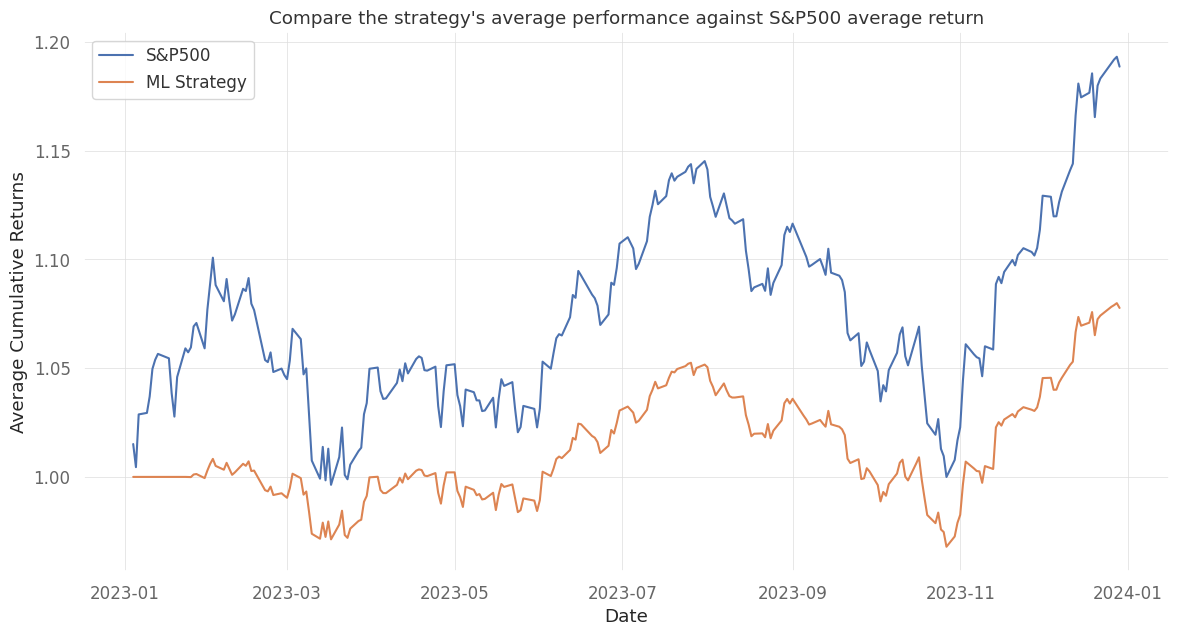

In [37]:
plt.figure(figsize=(14, 7)) 
plt.plot(price.index, sp500, label="S&P500") 
plt.plot(performance.index, ml_strat, label='ML Strategy')

plt.title(f"Compare the strategy's average performance against S&P500 average return")
plt.xlabel('Date') 
plt.ylabel('Average Cumulative Returns') 
plt.legend() 

In [38]:
returns = ml_strat.pct_change(periods=21)
text = "# Strategy Performance\n"
text += f"Monthly Expected Return: {returns.mean():.3f}\n"
text += f"Monthly Volatility: {returns.std():.3f}\n"
text += f"Sharpe ratio: {returns.mean() / returns.std():.3f}\n"
returns = sp500.pct_change(periods=21)
text += f"# S&P500 Performance\n"
text += f"Monthly Expected Return: {returns.mean():.3f}\n"
text += f"Monthly Volatility: {returns.std():.3f}\n"
text += f"Sharpe ratio: {returns.mean() / returns.std():.3f}\n"
print(text)

# Strategy Performance
Monthly Expected Return: 0.006
Monthly Volatility: 0.025
Sharpe ratio: 0.226
# S&P500 Performance
Monthly Expected Return: 0.010
Monthly Volatility: 0.045
Sharpe ratio: 0.222

